# Customer Analisis Round 6
The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.
## Instructions
Processing the data
- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

Linear Regression
- Train-test split.
- Apply linear regression.

Model Validation (Description):
- R2.
- MSE.
- RMSE.
- MAE.


In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_analysis = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
print("The number of rows and columns is", customer_analysis.shape)
display(customer_analysis.info()) # display infor to get a first impression on the information in the dataframe

The number of rows and columns is (9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Mon

None

In [3]:
customer_analysis.head(10) # check how the information is stored to later apply standardizations

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


Standardize columns

In [4]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # I had to change this part because in this version of the csv file there is no "unnamed: 0" column (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [5]:
customer_copy = customer_analysis.copy() # work on the copy

In [6]:
customer_copy = clean_columns(customer_copy) # apply standardization
customer_copy.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,1
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2


In [7]:
nulls = pd.DataFrame(round(customer_copy.isna().sum()/len(customer_copy),4)*100) # check for missing values
display(nulls)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


## Explore the data

In [8]:
numerical = customer_copy.select_dtypes(include=np.number)
categorical = customer_copy.select_dtypes(include=object)
display(numerical.info())
display(categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
 8   effective_month                9134 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 642.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


None

Checking normality of numerical variables

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
%matplotlib inline

In [10]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
effective_month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


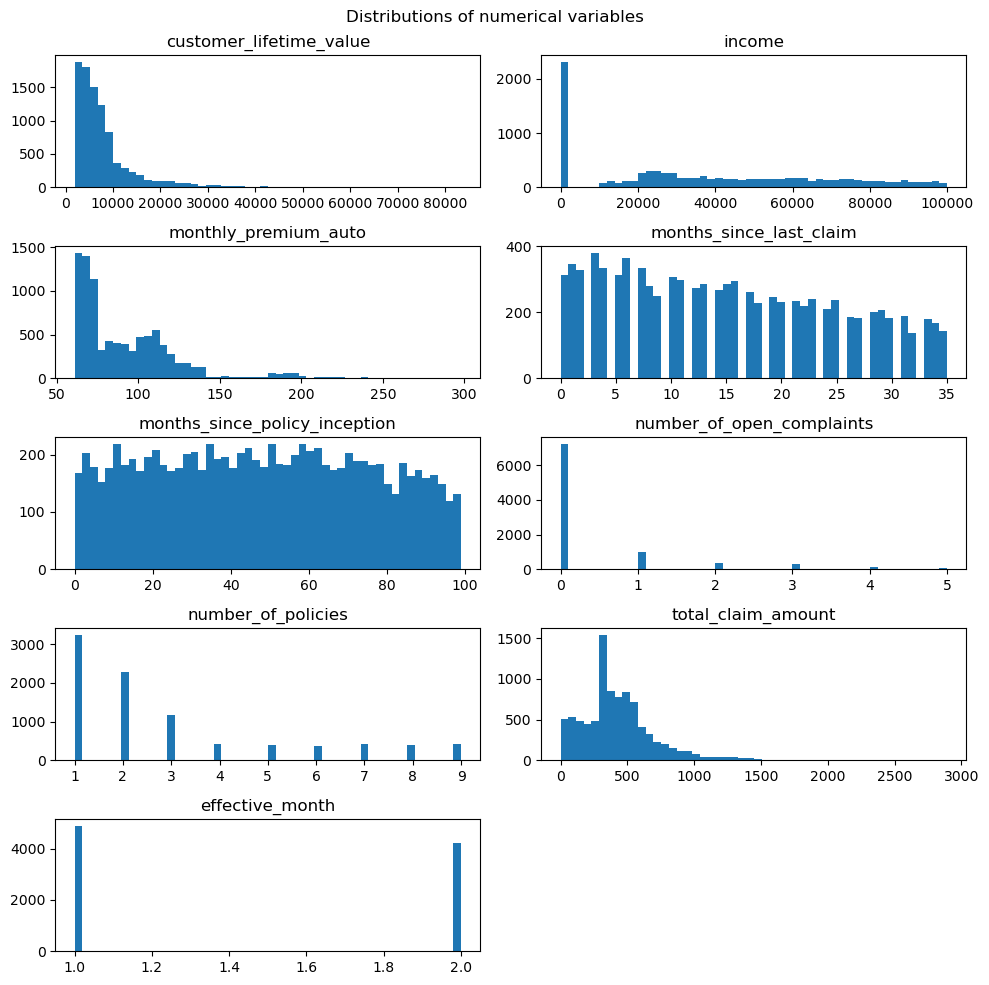

In [11]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax,figsize=(10,10))
        ax.set_title(var_name)
        ax.grid(False)
    fig.suptitle('Distributions of numerical variables')
    fig.tight_layout()  
    plt.show()

draw_histograms(numerical, numerical.columns, 5, 2) 

Multicollinearity between variables

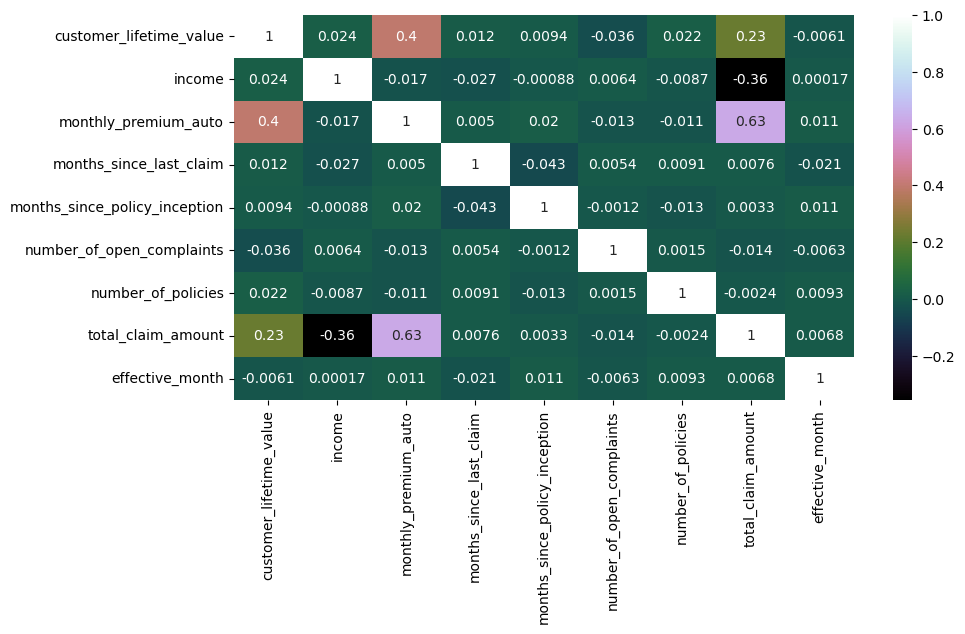

In [12]:
correlations_matrix = numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_matrix, annot=True, cmap="cubehelix") # annot = False: doesn't show the values of the correlation
plt.show()
# No high correlation between the independent variables. Dependent: total claim amount

## Building the model

x-y split

In [13]:
# Build X and y
y = customer_copy['total_claim_amount'] # Dependent
X = customer_copy.drop(['total_claim_amount'], axis=1)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

Transform some variables from numerical to object (string) because they are actually categories (months). Maybe number of policies and open complaints could/should also be transformed.

In [15]:
X['effective_month'] = X['effective_month'].astype('object')

In [16]:
# split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalize numerical variables

In [17]:
X_train_df = pd.DataFrame(X_train, columns=X.columns) # cast the lists created when doing the split into dataframes
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number) # separate numeric and categorical
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(['object'])
X_test_cat  = X_test_df.select_dtypes(['object'])


In [18]:
# Drop customer from the categorical data because it's just an identification number for th customer
# and doesn't influence the prediction.
# Also, when applying transformations like "One hot" it will create as many columns as costumer
# making our dataframe unnecessarily big.
X_train_cat = X_train_cat.drop('customer', axis=1)
X_test_cat  = X_test_cat.drop('customer', axis=1)

display(X_train_cat.head())
display(X_test_cat.head())

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
5123,Washington,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,1
7738,Oregon,No,Extended,College,Unemployed,F,Suburban,Single,Special Auto,Special L2,Offer3,Branch,Four-Door Car,Medsize,2
214,Arizona,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,Personal L1,Offer4,Agent,Four-Door Car,Small,2
8580,California,No,Basic,Bachelor,Employed,F,Urban,Married,Corporate Auto,Corporate L3,Offer3,Web,Four-Door Car,Medsize,1
7857,Washington,No,Basic,Bachelor,Employed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Web,Four-Door Car,Medsize,1


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
708,California,No,Basic,High School or Below,Employed,M,Rural,Married,Personal Auto,Personal L3,Offer2,Agent,SUV,Medsize,1
47,Oregon,No,Basic,High School or Below,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer4,Agent,Two-Door Car,Medsize,1
3995,Oregon,Yes,Extended,College,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Agent,Two-Door Car,Small,1
1513,California,No,Extended,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Medsize,2
3686,Washington,No,Basic,High School or Below,Disabled,F,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,2


In [28]:
display(X_train_cat['response'].unique())
display(X_train_cat['coverage'].unique())
display(X_train_cat['gender'].unique())
display(X_train_cat['effective_month'].unique())

array(['No', 'Yes'], dtype=object)

array(['Basic', 'Extended', 'Premium'], dtype=object)

array(['M', 'F'], dtype=object)

array([1, 2], dtype=object)

In [19]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Transforming data
transformer = PowerTransformer() # Normalizes data: stabilize variance, minimize skewness
transformer.fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled = transformer.transform(X_train_num) # np array
X_test_scaled  = transformer.transform(X_test_num) # np array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test_num.columns)
display(X_train_scaled.head())
display(X_train_scaled.describe().T)

## ERROR: RuntimeWarning: divide by zero encountered in log  loglike = -n_samples / 2 * np.log(x_trans.var())
## Google: apparently there's a problem with lambda - need further research


c:\Users\marta\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.0,0.628700,-1.540490,1.187764,-0.470922,1.939681,1.666073
1,0.0,-1.651699,-0.227597,1.326207,-0.744823,-0.503641,-1.152077
2,0.0,0.958293,-0.515504,-0.696294,0.708432,-0.503641,-1.152077
3,0.0,0.871819,-1.258991,-1.461178,0.677707,-0.503641,1.666073
4,0.0,0.674615,-1.088374,-1.277595,1.269733,-0.503641,-1.152077


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7307.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
income,7307.0,2.140374e-16,1.000068,-1.651699,-1.651699,0.366821,0.758846,1.122570
monthly_premium_auto,7307.0,-9.443405e-14,1.000068,-1.540490,-0.929813,-0.027193,0.856937,2.268045
months_since_last_claim,7307.0,2.358407e-16,1.000068,-1.947771,-0.826051,0.059660,0.821334,1.655602
months_since_policy_inception,7307.0,-2.953707e-17,1.000068,-2.084540,-0.785612,0.098816,0.830045,1.633133
number_of_open_complaints,7307.0,-9.581010e-16,1.000068,-0.503641,-0.503641,-0.503641,-0.503641,2.044419
number_of_policies,7307.0,-3.393420e-16,1.000068,-1.152077,-1.152077,-0.072220,0.871733,1.666073


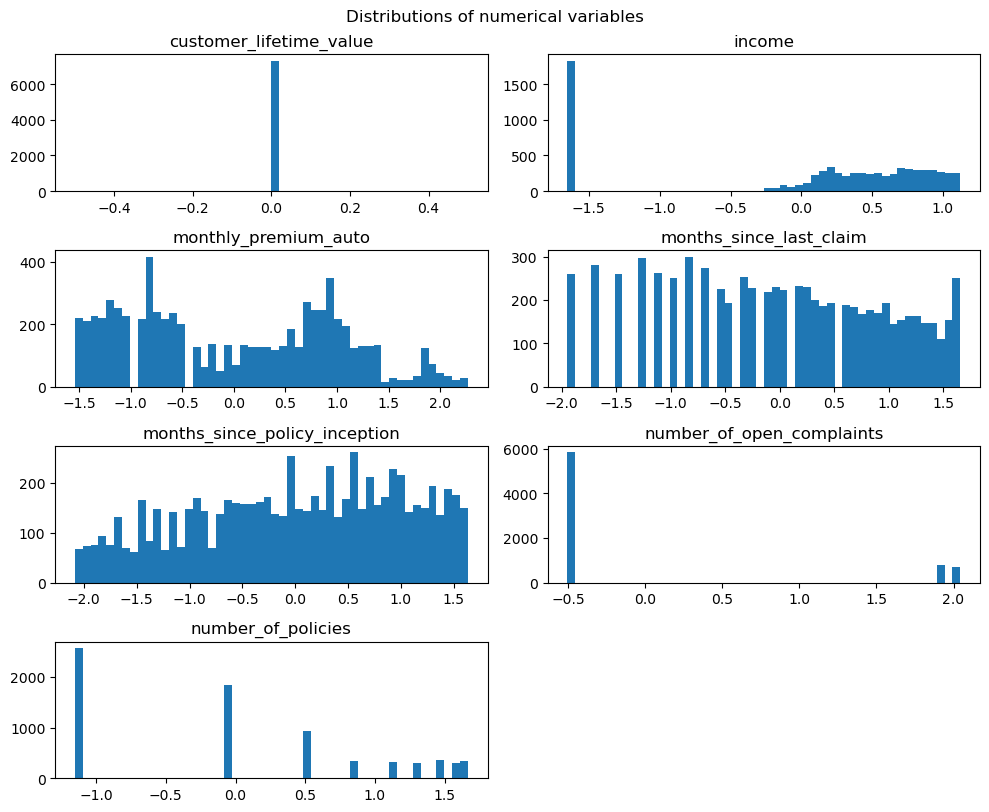

In [33]:
draw_histograms(X_train_scaled, X_train_scaled.columns, 5, 2) 

Tested with MinMaxScaler

In [21]:
# Normalizing data
transformer2 = MinMaxScaler()
transformer2.fit(X_train_num) # we will reuse this transformer for X_test later
X_train_scaled2 = transformer2.transform(X_train_num) # np array
X_test_scaled2  = transformer2.transform(X_test_num) # np array
X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=X_train_num.columns)
X_test_scaled2  = pd.DataFrame(X_test_scaled2, columns=X_test_num.columns)
display(X_train_scaled2.head())
display(X_train_scaled2.describe().T)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.0
1,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.0
2,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.0
3,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.0
4,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,7307.0,0.075218,0.083408,0.0,0.026567,0.048187,0.087305,1.0
income,7307.0,0.375249,0.301980,0.0,0.000000,0.338124,0.618077,1.0
monthly_premium_auto,7307.0,0.137396,0.146327,0.0,0.029536,0.092827,0.202532,1.0
months_since_last_claim,7307.0,0.430933,0.288692,0.0,0.171429,0.400000,0.657143,1.0
months_since_policy_inception,7307.0,0.484430,0.282623,0.0,0.242424,0.484848,0.717172,1.0
number_of_open_complaints,7307.0,0.076009,0.182293,0.0,0.000000,0.000000,0.000000,1.0
number_of_policies,7307.0,0.248529,0.300116,0.0,0.000000,0.125000,0.375000,1.0


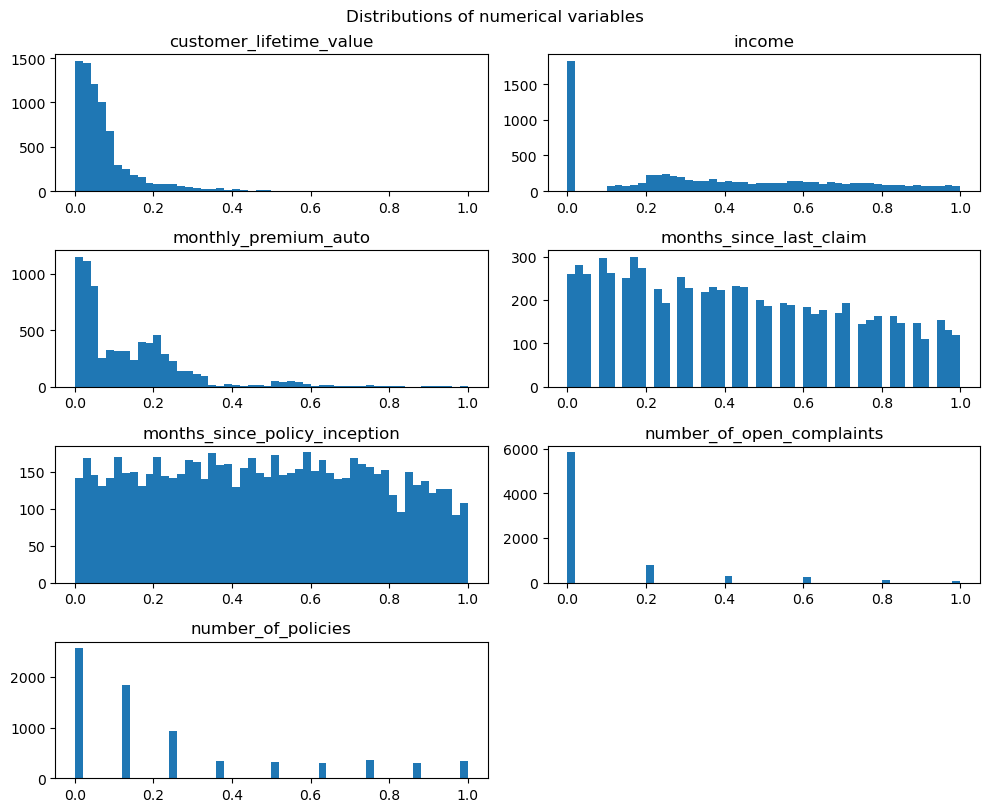

In [22]:
draw_histograms(X_train_scaled2, X_train_scaled2.columns, 5, 2) 

Alternative: Standard scaler

In [ ]:
# Do not run this code - it's for later study and test
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_train_num) # This will obtain the mean and the sd of each column
X_train_stand = Standardtransformer.transform(X_train_num) # Applies the transformation
print("The numpy array looks like this: ",X_train_stand)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(X_train_stand),X_train_stand.shape))
X_train_stand = pd.DataFrame(X_train_stand,columns=X_train_num.columns)
display(X_train_stand.head())

X_test_stand = Standardtransformer.transform(X_test_num)
X_test_stand  = pd.DataFrame(X_test_stand, columns=X_test_num.columns)
display(X_test_stand)

In [ ]:
# Concatanation when applying different transformations
# pd.concat([X_num,x_normalized,x_standardized],axis=1)

Transform categorical values
- One hot / label encoder

In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first') # The option drop='first' drops one of the possible values.
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray() # we need to cast it as an array

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoder.get_feature_names_out())
X_train_encoded_df.head(10)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_month_2
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Label enconder for effective_month -> only has 2 values

In [ ]:
# Do not run this code
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(X_cat)
X_cat_trans = label_encoder.transform(X_cat) # ordered wrt value counts
X_cat_trans = pd.DataFrame(X_cat_trans,columns=X_cat.columns)
display(X_cat_trans.head(20))
X_cat_trans['gender'].value_counts()

In [24]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test_df = pd.DataFrame(encoded_test_cat, columns=encoder.get_feature_names_out())
onehot_encoded_test_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_month_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Concatenate numerical and categorical transformed independent variables

In [25]:
X_train_treated_df = pd.concat([X_train_scaled, X_train_encoded_df], axis=1)
display(X_train_treated_df)
X_test_treated_df = pd.concat([X_test_scaled, onehot_encoded_test_df], axis=1)
display(X_test_treated_df)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_month_2
0,0.0,0.628700,-1.540490,1.187764,-0.470922,1.939681,1.666073,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,-1.651699,-0.227597,1.326207,-0.744823,-0.503641,-1.152077,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.958293,-0.515504,-0.696294,0.708432,-0.503641,-1.152077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.871819,-1.258991,-1.461178,0.677707,-0.503641,1.666073,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.674615,-1.088374,-1.277595,1.269733,-0.503641,-1.152077,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,0.0,1.020878,-1.540490,1.393910,0.584719,-0.503641,-0.072220,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7303,0.0,0.137703,-0.578855,0.332130,0.615853,-0.503641,0.506467,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7304,0.0,-1.651699,1.254056,-0.036564,-1.770033,-0.503641,1.456782,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7305,0.0,-1.651699,1.401596,-0.964520,0.362634,-0.503641,-0.072220,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,effective_month_2
0,0.0,0.895248,0.781387,-1.675459,0.132444,-0.503641,-1.152077,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.154029,-0.712069,-0.696294,-1.423915,-0.503641,0.871733,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.080761,0.419397,-1.277595,-0.249467,-0.503641,-1.152077,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.920566,0.583196,-1.277595,-0.664587,1.939681,1.125205,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.166668,-0.854684,0.418295,-1.225126,-0.503641,-0.072220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.0,0.727514,0.881010,1.393910,0.890111,-0.503641,0.506467,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1823,0.0,0.847392,-1.258991,0.821334,0.739026,-0.503641,-0.072220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1824,0.0,1.037387,1.014936,0.897201,-1.372483,-0.503641,-1.152077,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1825,0.0,-1.651699,-1.349230,1.326207,-1.645524,1.939681,-1.152077,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Linear regression

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_treated_df,y_train)

LinearRegression()

Error metrics

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_train = lm.predict(X_train_treated_df)
r2_train = r2_score(y_train, y_pred_train)
display(round(r2_train,2))

0.76

In [38]:
y_pred_test = lm.predict(X_test_treated_df)
r2_test = r2_score(y_test, y_pred_test)
display(round(r2_test,2))

0.75

In [36]:
#Mean squared error
mse_train = (mean_squared_error(y_train, y_pred_train))
display(round(mse_train,2))

mse_test = (mean_squared_error(y_test,y_pred_test))
display(round(mse_test,2))

20365.81

20117.01

In [33]:
# Root mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
display(round(rmse_train, 2))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
display(round(rmse_test,2))

142.71

141.83

In [35]:
# Mean absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
print("The mean absolute error for the train lm",round(mae_train,2))

mae_test = mean_absolute_error(y_test, y_pred_test)
print("The mean absolute error of the test lm is", round(mae_test,2))

The mean absolute error for the train lm 97.53
The mean absolute error of the test lm is 96.65


## Conclusions/Ideas
_Notes for my future self_

Numerical

For improving the model, I would remove variables such us number of policies and number of open complaints from numerical and change them to categorical and test the transformations again. Or find a better transformation for those specific ones.

Log transform heavily skewed ones - test. Possibility: apply second transformation.

Categorical

Income: A lot of people with no income. Find a better transformation or define a separate model for people with no income.

Label enconder for effective_month -> only has 2 values
